## Observations and Insights 

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_and_mouse_original=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
study_and_mouse_original



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [245]:
# Checking the number of mice.
number_of_mice = study_and_mouse_original['Mouse ID'].nunique()
number_of_mice


249

In [246]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
bad_mice_id= study_and_mouse_original[study_and_mouse_original.duplicated()].reset_index(drop=True).at[0,'Mouse ID']
bad_mice_id



'g989'

In [247]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# creates a dataframe of the rows that need to be dropped
mice_to_drop=study_and_mouse_original.loc[study_and_mouse_original["Mouse ID"]==bad_mice_id,:]
mice_to_drop
#drops rows based on index
study_and_mouse_working=study_and_mouse_original.drop(labels=mice_to_drop.index,axis=0)
study_and_mouse_working



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [248]:
# Checking the number of mice in the clean DataFrame.
study_and_mouse_working["Mouse ID"].nunique()


248

## Summary Statistics

In [249]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# # mean, median, variance, standard deviation, and SEM of the tumor volume. 
# # Assemble the resulting series into a single summary dataframe.

sm_gbo=study_and_mouse_working.groupby('Drug Regimen')

sm_stats_df=pd.DataFrame({"Tumor Volume Mean":sm_gbo["Tumor Volume (mm3)"].mean(),
        "Tumor Volume Median":sm_gbo["Tumor Volume (mm3)"].median(),
        "Tumor Volume Variance":sm_gbo["Tumor Volume (mm3)"].var(),
        "Tumor Volume StDev":sm_gbo["Tumor Volume (mm3)"].std(),
        "Tumor Volume SEM":sm_gbo["Tumor Volume (mm3)"].sem()
})

sm_stats_df




,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [250]:
# # Using the aggregation method, produce the same summary statistics in a single line
stat_gbo_agg=(sm_gbo["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']))
stat_gbo_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

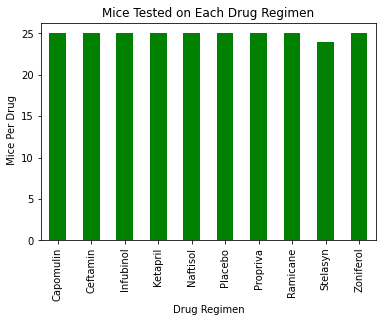

In [251]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#preping the data
mice_per_drug=study_and_mouse_original.groupby('Drug Regimen')[['Mouse ID']].nunique()
mice_per_drug = mice_per_drug.rename(columns={'Mouse ID':'Mice Per Drug'})

#plotting the data
mice_per_drug_p_plot=mice_per_drug.plot(kind="bar",title='Mice Tested on Each Drug Regimen',legend=False,color="green")
mice_per_drug_p_plot.set_ylabel(' Mice Per Drug')
mice_per_drug_p_plot

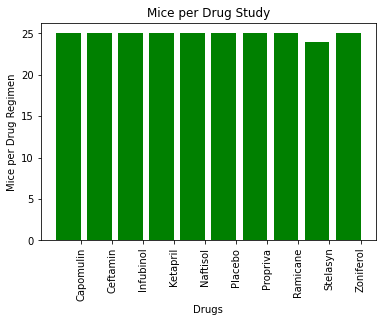

In [252]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#
#prepping the data
x_range = np.arange(len(mice_per_drug["Mice Per Drug"]))
plt.bar(mice_per_drug.index,mice_per_drug["Mice Per Drug"],color="green")
tick_locations = [value+0.4 for value in x_range]

#plotting the data
plt.xticks(tick_locations,mice_per_drug.index,rotation='vertical')
plt.xlabel('Drugs')
plt.ylabel('Mice per Drug Regimen')
plt.title("Mice per Drug Study")
plt.show()



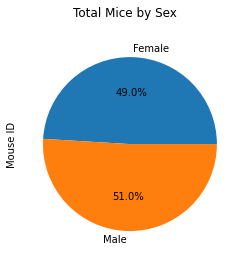

In [253]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#need to figure out how to remove "Mouse ID" from the graph and add the percentage
sex_gbo=study_and_mouse_working.groupby("Sex")[['Mouse ID']].count()
sex_pie=sex_gbo.plot(kind="pie",subplots="True",title=("Total Mice by Sex"),legend=False,autopct="%1.1f%%")


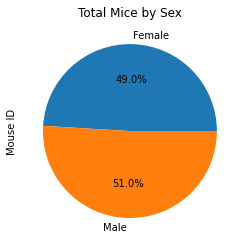

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_gbo=study_and_mouse_working.groupby("Sex")[['Mouse ID']].count()

plt.pie(gender_gbo,labels=gender_gbo.index,autopct="%1.1f%%")
plt.title('Total Mice by Sex')
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [255]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#creates a dataframe of all entries related to the 4 requested drugs
top_drugs_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
top_drugs_df =study_and_mouse_working.loc[study_and_mouse_working['Drug Regimen'].isin(top_drugs_list)]

#finds the max time point for each drug and mouse
top_time=pd.DataFrame(top_drugs_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max())

#meges in the orginal dataframe on the 
final_tumor_volumes = pd.merge(top_time,study_and_mouse_working[['Timepoint','Mouse ID','Tumor Volume (mm3)','Drug Regimen']], on=['Timepoint','Mouse ID','Drug Regimen'])
final_tumor_volumes


,Timepoint,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,45,b128,Capomulin,38.982878
1,45,b742,Capomulin,38.939633
2,20,f966,Capomulin,30.485985
3,45,g288,Capomulin,37.074024
4,45,g316,Capomulin,40.159220
...,...,...,...,...
95,45,s508,Ramicane,30.276232
96,45,u196,Ramicane,40.667713
97,5,w678,Ramicane,43.166373
98,15,y449,Ramicane,44.183451


In [256]:
# Put treatments into a list for for loop (and later for plot labels)
# top_drugs_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

top_drugs_list

# cap_df
# ram_df
# inf_df
# ceft_df

# Create empty list to fill with tumor vol data (for plotting)


tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

#### this isn't working right now but it should print off the interquartile range for each drug
# for regimen in top_drugs_list:
#     quarts=final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen']==regimen,:].quantile([.25,.5,.75])
#     lowerq=quarts[.25]
#     upperq=quarts[.75]
#     iqr = upperq-lowerq

#     print(f'the iqr for{regimen} is {iqr}')

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

KeyError: 0.25

In [188]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [189]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [190]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [191]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
